In [431]:
import pandas as pd
import matplotlib.pyplot as plt

import re
import requests

# Загрузка данных
data = pd.read_csv('/Users/test/Desktop/проект/_data.csv')

pd.set_option('display.max_columns', 30) 
# Просмотр первых нескольких строк данных
data.head()

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",ID 31618: Эксклюзивное предложение. Современн...,Евроремонт,14-42-20-19,NaN,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,Евроремонт,20 18,NaN,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.9,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615


In [432]:
# Удаляем неиформативные столбцы
data = data.drop(['Unnamed: 0', 'Телефоны', 'Тип', 'Телефоны', 'Балкон', 'Окна', 'Санузел', 'Название ЖК', 'Серия дома', 'Высота потолков, м', 'Лифт','Мусоропровод', 'Ссылка на объявление','Дополнительно'], axis = 1)

In [433]:
# 2 Нормируем и заполняем данными столбец Количество комнат

# Функция для очистки строки, оставляющая только цифры
def extract_digits(text):
    digits = re.findall(r'\d+', str(text))  # Находим все цифры в строке
    return ''.join(digits)  # Объединяем найденные цифры в одну строку

# Очищаем столбец "Количество комнат"
data['Количество комнат'] = data['Количество комнат'].apply(extract_digits)

# Заполняем пустые значения в столбце "Количество комнат" из столбца "Площадь комнат, м2"
data['Количество комнат'] = data['Количество комнат'].fillna(data['Площадь комнат, м2'].apply(extract_digits))

# Удаляем столбец Площадь комнат
data = data.drop(['Площадь комнат, м2'], axis = 1)

In [434]:
# 4 Нормируем и заполняем данными столбец Метро

def extract_minutes(text):
    match = re.search(r'\((\d+)\s*мин\s*пешком\)', str(text))
    if match:
        return int(match.group(1))
    else:
        return None

# Применяем функцию для извлечения числовых значений
data['Метро'] = data['Метро'].apply(extract_minutes)

# Преобразуем столбец в числовой формат
data['Метро'] = pd.to_numeric(data['Метро'], errors='coerce')

# Заполняем пропущенные значения медианой
median_value = data['Метро'].median()
data['Метро'] = data['Метро'].fillna(median_value)

In [435]:
# 5 Нормируем столбец Адрес

#оставляю адреса, где в адресе только Москва
data = data[data['Адрес'].str.contains("Москва")].reset_index(drop = True)

In [436]:
# 6 Нормируем столбец Площадь

# Функция для извлечения первого значения из строки
def extract_first_value(text):
    values = str(text).split('/')  # Разделяем строку по символу "/"
    return values[0].strip()  # Возвращаем первое значение, удаляя лишние пробелы

# Применяем функцию к столбцу "Площадь, м2"
data['Площадь, м2'] = data['Площадь, м2'].apply(extract_first_value)

In [437]:
# 7 Нормируем столбец Дом


# Разбиваем колонку дом
# Разбиваем колонку дом
data['Тип дома'] = [row.split(', ')[-1] if len(row.split(', ')[-1]) > 6 else 'Неизвестно' for row in data['Дом']]
data['Этажность дома'] = [int(row.split('/')[1].split(',')[0]) for row in data['Дом']]
data['Этаж квартиры'] = [int(row.split('/')[0]) for row in data['Дом']]
df = data.drop(['Дом'], axis = 1)

del data['Дом']

In [438]:
# 8 Нормируем столбец Парковка

#обрабатываю колонку Парковку, привожу к числовому значению 
data['Парковка'] = data['Парковка'].fillna(0).replace({'подземная': 1, 'наземная': 1, 'открытая': 1, 'многоуровневая': 1, 'на крыше': 1})

In [439]:
pip install currency_converter

Defaulting to user installation because normal site-packages is not writeable
  Using cached currency.converter-0.5.5.tar.gz (53 kB)
    Running setup.py install for currency-converter ... done
You should consider upgrading via the '/usr/local/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [440]:
# 9 Нормируем столбец Цена

# Отдельная колонка про коммунальные услуги, пропущенные значения заменил 0 + в колонке 'Цена' оставил только цену за месяц                                   

def extract_info(text):
    match = re.search(r'(Коммунальные услуги включены)', str(text))
    return 1 if match else 0

data1 = data

# data1['Коммунальные услуги'] = data['Цена'].apply(extract_info)
# data1['Коммунальные услуги'] = data['Коммунальные услуги']. fillna (0)

data1['Цена']=data['Цена'].str.split().str[0]
data1['Цена']=data['Цена'].astype(float)

In [441]:
# 12 Нормируем столбец Ремонт

#Обозначаем искомые слова
# keywords = ['Дизайнерский', 'Евроремонт', 'Косметический','Без ремонта', 'дизайнерский', 'евроремонт', 'косметический','без ремонта']

# Функция для извлечения типа ремонта из описания
#def extract_renovation(description):
#    for keyword in keywords:
#        if keyword in description:
#            return keyword
#    return ''

# Создали новый столбец и заполнили ячейки в столбце 'ремонт1'
# Написали функцию для извлечения типа ремонта из описания
#data['ремонт1'] = data['Описание'].apply(extract_renovation)

# Написали функцию для заполнения пустых ячеек колонки Ремонт
#data['Ремонт'] = data['Ремонт'].fillna(data['ремонт1'])

# 
#count = data.Ремонт.value_counts()
#count - видим, что заполнили только 52 ячейки из описания.
#Этого недостаточно для 90% заполненности колонки, поэтому этот метод
# мы использовать не будем

#Заполняем пропущенные значения
data['Ремонт'] = data['Ремонт'].fillna('Не указан')

# Переписываем данные про ремонт в ту же колонку: 
repair_mapping = {
    'Дизайнерский': 2,
    'Евроремонт': 1,
    'Косметический': 0,
    'Без ремонта': 0,
    'Не указан': 1
}

#Так как в результате исследования мы выяснили, что медианная цена у 'Не указан' и 'Евроремонт' практически одинаковая, 
# то мы объединили их в одну переменную для дальнейшего анализа

data['Ремонт'] = data['Ремонт'].map(repair_mapping)
data

,ID объявления,Количество комнат,Метро,Адрес,"Площадь, м2",Парковка,Цена,Описание,Ремонт,Можно с детьми/животными,Тип дома,Этажность дома,Этаж квартиры
0,271271157,4,9.0,"Москва, улица Новый Арбат, 27",200.0,1,500000.0,Без комиссии для нанимателя! Бонус коллегам 12...,2,"Можно с детьми, Можно с животными",Монолитный,16,5
1,271634126,4,8.0,"Москва, улица Новый Арбат, 27",198.0,1,500000.0,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,2,Можно с детьми,Монолитно-кирпичный,16,5
2,271173086,4,7.0,"Москва, улица Новый Арбат, 27",200.0,1,500000.0,"ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",1,Можно с детьми,Неизвестно,16,5
3,272197456,4,3.0,"Москва, переулок Плотников, 21С1",170.0,1,400000.0,ID 31618: Эксклюзивное предложение. Современн...,1,Можно с животными,Неизвестно,6,5
4,273614615,2,7.0,"Москва, улица Новый Арбат, 15",58.0,0,225000.0,Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,1,NaN,Панельный,26,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19732,215565511,,8.0,"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0,0,42000.0,Сдаётся светлая теплая квартира (студия) с бал...,1,NaN,Неизвестно,14,10
19733,274654844,1,7.0,"Москва, Производственная улица, 8к1, ш. Боровс...",38.7,0,45000.0,Сдам однокомнатную квартиру на длительный срок...,1,NaN,Монолитный,18,5
19734,268679909,2,6.0,"Москва, Боровский проезд, 11",43.1,0,50000.0,Рассматриваются квартиранты только славяне и т...,2,Можно с детьми,Кирпичный,5,5
19735,274807525,2,11.0,"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",52.5,1,55000.0,Двухкомнатная уютная квартира с видом во внутр...,1,NaN,Монолитный,23,8


In [442]:
# 17 Нормируем столбец Можно с детьми/животными

# Заменил все возможные 'можно' в оригинальной колонке на 1, пропущенные значения на 0

def replace_children_pets(text):
    match = re.search(r'(Можно)', str(text))
    if match:
        return '1'
    else:
        return None

data1['Можно с детьми/животными'] = data['Можно с детьми/животными'].apply(replace_children_pets)
data1['Можно с детьми/животными'] = data['Можно с детьми/животными'].fillna(0)

In [443]:
# Создаем словарь, в котором ключи - это старые названия столбцов, а значения - новые названия
new_column_names = {
    'ID объявления': 'listing_id',
    'Количество комнат': 'number_of_rooms',
    'Метро': 'metro',
    'Адрес': 'address',
    'Площадь, м2': 'area_sqm',
    'Парковка': 'parking',
    'Цена': 'price',
    'Описание': 'description',
    'Ремонт': 'renovation',
    'Можно с детьми/животными': 'pet/child_allowed',
    'Дополнительно': 'additional_info',
    'Этаж квартиры': 'floor',
    'Этажность дома': 'total_floors',
    'Коммунальные услуги': 'utilities',
    'Тип дома': 'type_house'
}

# Изменяем названия столбцов, используя метод rename() с аргументом columns
data = data.rename(columns=new_column_names)

# Выводим первые строки датасета для проверки
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19737 entries, 0 to 19736
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID  объявления     19737 non-null  int64  
 1   number_of_rooms    19737 non-null  object 
 2   metro              19737 non-null  float64
 3   address            19737 non-null  object 
 4   area_sqm           19737 non-null  object 
 5   parking            19737 non-null  int64  
 6   price              19737 non-null  float64
 7   description        19737 non-null  object 
 8   renovation         19737 non-null  int64  
 9   pet/child_allowed  19737 non-null  object 
 10  type_house         19737 non-null  object 
 11  total_floors       19737 non-null  int64  
 12  floor              19737 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 2.0+ MB


In [444]:
# Сохранение изменений в новый файл
data.to_csv('../data/data.csv', index=False, sep='\t')

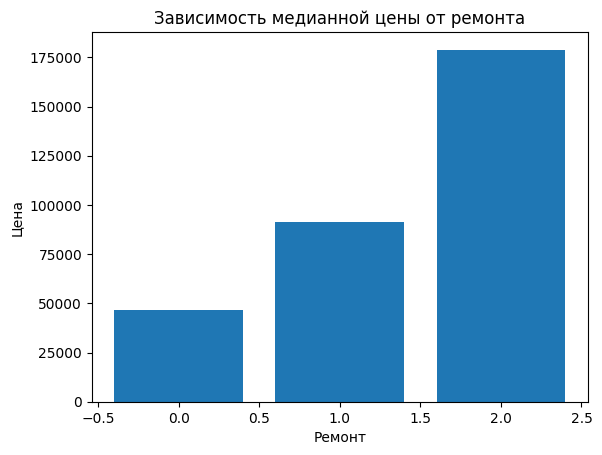

In [445]:
#Сделали группировку ремонта по медианной цене
renov = data.groupby('renovation',as_index = False).agg({'price':'mean'}).sort_values('price',ascending = False).head(5)


plt.bar(renov['renovation'],renov['price'])
plt.xlabel('Ремонт')
plt.ylabel('Цена')
plt.title('Зависимость медианной цены от ремонта')
plt.show()

#По этому bar chart мы отчетливо видим, что цена на медианная цена квартиры с дизайнерским ремонтом выше евро и "не указан",  
#а цена квартир с косметическим ремонтом и без ремонта, самая низкая.
#Эта колонка репрезентативна и мы можем ее использовать для дальнейшей работы.

In [446]:
data.columns = ['listing_id'] + list(data.columns[1:])

#удаляем колонку 'description'
data = data.drop(columns=['description'])

In [447]:
data

,listing_id,number_of_rooms,metro,address,area_sqm,parking,price,renovation,pet/child_allowed,type_house,total_floors,floor
0,271271157,4,9.0,"Москва, улица Новый Арбат, 27",200.0,1,500000.0,2,1,Монолитный,16,5
1,271634126,4,8.0,"Москва, улица Новый Арбат, 27",198.0,1,500000.0,2,1,Монолитно-кирпичный,16,5
2,271173086,4,7.0,"Москва, улица Новый Арбат, 27",200.0,1,500000.0,1,1,Неизвестно,16,5
3,272197456,4,3.0,"Москва, переулок Плотников, 21С1",170.0,1,400000.0,1,1,Неизвестно,6,5
4,273614615,2,7.0,"Москва, улица Новый Арбат, 15",58.0,0,225000.0,1,0,Панельный,26,12
...,...,...,...,...,...,...,...,...,...,...,...,...
19732,215565511,,8.0,"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0,0,42000.0,1,0,Неизвестно,14,10
19733,274654844,1,7.0,"Москва, Производственная улица, 8к1, ш. Боровс...",38.7,0,45000.0,1,0,Монолитный,18,5
19734,268679909,2,6.0,"Москва, Боровский проезд, 11",43.1,0,50000.0,2,1,Кирпичный,5,5
19735,274807525,2,11.0,"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",52.5,1,55000.0,1,0,Монолитный,23,8
